In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import Image
import plotly.graph_objects as go

In [3]:
titanic = sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [4]:
null_values = titanic.isnull().sum()/titanic.shape[0]*100
null_values

survived        0.000000
pclass          0.000000
sex             0.000000
age            19.865320
sibsp           0.000000
parch           0.000000
fare            0.000000
embarked        0.224467
class           0.000000
who             0.000000
adult_male      0.000000
deck           77.216611
embark_town     0.224467
alive           0.000000
alone           0.000000
dtype: float64

In [5]:
titanic = titanic.drop(null_values[null_values>50].index, axis=1)
titanic = titanic.drop(['embarked','adult_male'], axis=1)
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,class,who,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,Third,man,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,First,woman,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,Third,woman,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,First,woman,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,Third,man,Southampton,no,True


In [6]:
age_by_group = titanic.groupby(['sex','who'])['age'].agg('median')
titanic['age'] = titanic.apply(
    lambda row: age_by_group[row['sex'],row['who']] 
    if np.isnan(row['age']) and (row['sex'],row['who']) in age_by_group.index 
    else row['age'], 
    axis=1
)

titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,class,who,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,Third,man,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,First,woman,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,Third,woman,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,First,woman,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,Third,man,Southampton,no,True


In [7]:
titanic = titanic.dropna().reset_index(drop=True)
titanic.shape

(889, 12)

* In titanic dataset of seaborn library, 'survived' column gives information about the individual survived or not.
* The distribution of survived people's age is plotted as below:

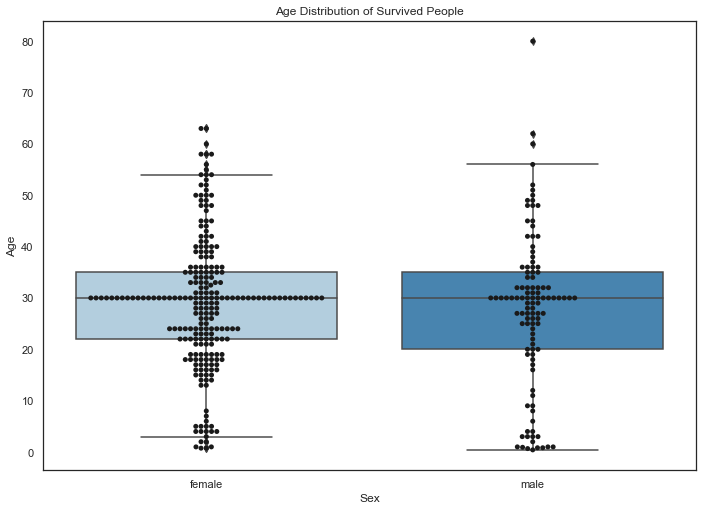

In [8]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set_theme(style='white')

ax = sns.boxplot(data=titanic[titanic['survived']==1], 
                 x= 'sex', 
                 y= 'age',
                 palette="Blues")

ax = sns.swarmplot(data=titanic[titanic['survived']==1], 
                 x= 'sex', 
                 y= 'age',
                 color="0.10").set(title="Age Distribution of Survived People", 
                                       xlabel="Sex",
                                       ylabel="Age")

* As per the plot, the average age of survived female is nearly equal to 28 and average age of male is nearly equal to 27.

In [9]:
avg_age = pd.pivot_table(titanic[(titanic['survived']== 1) ],
               index =['sex'], 
               values=['age'], 
               aggfunc= 'mean')

np.round(avg_age, 2)

,age
sex,
female,28.84
male,27.68


* The percentage distribution of the gender of the people who survived from the titanic.

In [10]:
gender_dist=pd.pivot_table(titanic,
                                 index =['sex'], 
                                 values=['survived'], 
                                 aggfunc= 'sum')

gender_dist['% survived'] = gender_dist['survived']*100/gender_dist['survived'].sum()

np.round(gender_dist.drop('survived', axis=1),2)

,% survived
sex,
female,67.94
male,32.06


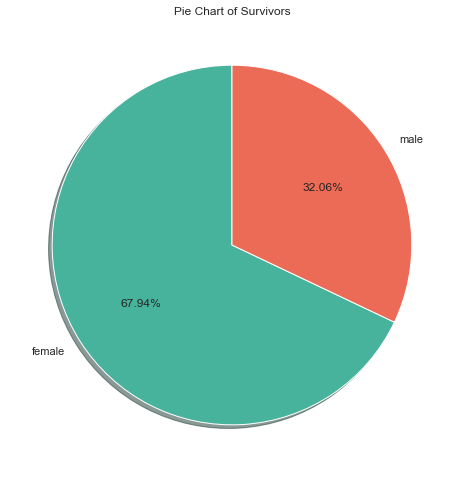

In [11]:
plt.pie(gender_dist['% survived'],
        labels=gender_dist.index,
        autopct='%1.2f%%',
        shadow=True,
        startangle=90,
        colors=["#47B39C", "#EC6B56"])
plt.title("Pie Chart of Survivors")
plt.show()

In [12]:
survived_people = titanic.groupby(['sex','embark_town'])['survived'].agg('sum').reset_index()

node_label = titanic['sex'].unique().tolist() + titanic['embark_town'].unique().tolist()
node_dict = {y:x for x, y in enumerate(node_label)}
node_dict

{'male': 0, 'female': 1, 'Southampton': 2, 'Cherbourg': 3, 'Queenstown': 4}

In [18]:
source_node = [node_dict[x] for x in survived_people['sex']]
target_node = [node_dict[x] for x in survived_people['embark_town']]

sankey_plot = dict(
    source = source_node, 
    target = target_node,
    value = survived_people['survived'])
data = go.Sankey(node = dict(
      pad = 25,
      thickness = 25,
      line = dict(color = "black", width = 0.5),
      label = node_label,
      color = "#47B39C"
    ),
    link = sankey_plot)
fig = go.Figure(data)
fig.update_layout(
    autosize=False,
    width=800,
    height=500)
fig.show()

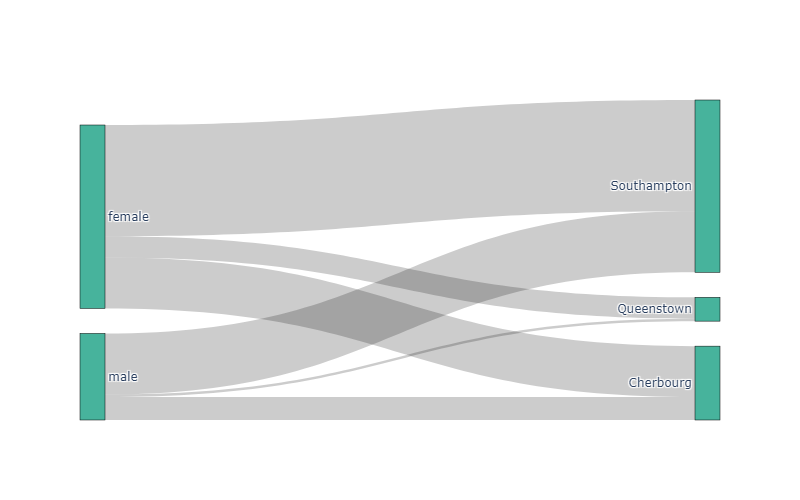

In [19]:
fig.write_image("SankeyPlot.png")
Image(filename='SankeyPlot.png') 